In [1]:
%matplotlib inline
from parcels import FieldSet, ParticleSet, JITParticle, AdvectionRK4
from datetime import timedelta, datetime
from parcels import FieldSet, ParticleSet, JITParticle, AdvectionRK4, plotTrajectoriesFile, ErrorCode
from datetime import timedelta
import datetime
import numpy as np
from scipy.io import netcdf
from netCDF4 import Dataset
import pandas as pd
from mpl_toolkits.basemap import Basemap

#from mpl_toolkits.basemap import Basemap

#import cartoframes

# import urllib2
# import StringIO
# import csv
import numpy as np
# import scipy.interpolate
import matplotlib.pyplot as plt
# import pickle as pickle
from parcels import rng as random
import math

# first trying 2014
filenames = {'U': "GOM_HYCOM_expt31.0_daily_uvwST_04012014_05312014.nc",
             'V': "GOM_HYCOM_expt31.0_daily_uvwST_04012014_05312014.nc"}

fname = 'GOM_HYCOM_expt31.0_daily_uvwST_04012014_05312014.nc'
pfile = Dataset('GOM_HYCOM_expt31.0_daily_uvwST_04012014_05312014.nc', 'r')
print(type(pfile))
pfile.dimensions
#print (pfile.variables['MT'])
#print (pfile.variables['Latitude'])
#print (pfile.variables['Longitude'])

<class 'netCDF4._netCDF4.Dataset'>


OrderedDict([('MT',
              <class 'netCDF4._netCDF4.Dimension'>: name = 'MT', size = 61),
             ('Depth',
              <class 'netCDF4._netCDF4.Dimension'>: name = 'Depth', size = 1),
             ('Latitude',
              <class 'netCDF4._netCDF4.Dimension'>: name = 'Latitude', size = 385),
             ('Longitude',
              <class 'netCDF4._netCDF4.Dimension'>: name = 'Longitude', size = 541)])

In [2]:

fname = 'GOM_HYCOM_expt31.0_daily_uvwST_04012014_05312014.nc'
filenames = {'U': fname, 'V': fname}
variables = {'U': 'u',
             'V': 'v'}
dimensions = {'lat': 'Latitude', 'lon': 'Longitude', 'depth': 'Depth', 'time': 'MT'}
fieldset = FieldSet.from_netcdf(filenames, variables, dimensions,allow_time_extrapolation=True)
#fieldset.fields()


netcdf GOM_HYCOM_expt31.0_daily_uvwST_04012014_05312014 {
dimensions:
        MT = 61 ;
        Depth = 1 ;
        Latitude = 385 ;
        Longitude = 541 ;
variables:
        float salinity(MT, Depth, Latitude, Longitude) ;
                salinity:coordinates = "MT Depth Latitude Longitude lat lon" ;
                salinity:standard_name = "sea_water_salinity" ;
                salinity:units = "psu" ;
                salinity:_FillValue = 1.267651e+30f ;
                salinity:valid_range = 0.7795895f, 38.07304f ;
                salinity:long_name = " salinity [31.0H]" ;
        double MT(MT) ;
                MT:long_name = "time" ;
                MT:units = "days since 1900-12-31 00:00:00" ;
                MT:calendar = "standard" ;
                MT:axis = "T" ;
                MT:_CoordinateAxisType = "Time" ;
        float Depth(Depth) ;
                Depth:standard_name = "depth" ;
                Depth:units = "m" ;
                Depth:positive = "down" ;
                Depth:axis = "Z" ;
                Depth:_CoordinateAxisType = "Height" ;
                Depth:_CoordinateZisPositive = "down" ;
        float Latitude(Latitude) ;
                Latitude:standard_name = "latitude" ;
                Latitude:units = "degrees_north" ;
                Latitude:axis = "Y" ;
                Latitude:_CoordinateAxisType = "Lat" ;
        float Longitude(Longitude) ;
                Longitude:standard_name = "longitude" ;
                Longitude:units = "degrees_east" ;
                Longitude:axis = "X" ;
                Longitude:_CoordinateAxisType = "Lon" ;
        float temperature(MT, Depth, Latitude, Longitude) ;
                temperature:coordinates = "MT Depth Latitude Longitude lat lon" ;
                temperature:standard_name = "sea_water_potential_temperature" ;
                temperature:units = "degC" ;
                temperature:_FillValue = 1.267651e+30f ;
                temperature:valid_range = 2.684097f, 32.14488f ;
                temperature:long_name = "  temp [31.0H]" ;
        float u(MT, Depth, Latitude, Longitude) ;
                u:coordinates = "MT Depth Latitude Longitude lat lon" ;
                u:standard_name = "eastward_sea_water_velocity" ;
                u:units = "m/s" ;
                u:_FillValue = 1.267651e+30f ;
                u:valid_range = -1.937595f, 2.165023f ;
                u:long_name = " u-veloc. [31.0H]" ;
        float v(MT, Depth, Latitude, Longitude) ;
                v:coordinates = "MT Depth Latitude Longitude lat lon" ;
                v:standard_name = "northward_sea_water_velocity" ;
                v:units = "m/s" ;
                v:_FillValue = 1.267651e+30f ;
                v:valid_range = -1.494334f, 2.272894f ;
                v:long_name = " v-veloc. [31.0H]" ;
        float w_velocity(MT, Depth, Latitude, Longitude) ;
                w_velocity:coordinates = "MT Depth Latitude Longitude lat lon" ;
                w_velocity:standard_name = "upward_sea_water_velocity" ;
                w_velocity:units = "m/s" ;
                w_velocity:_FillValue = 1.267651e+30f ;
                w_velocity:valid_range = -0.08710907f, 0.06940875f ;
                w_velocity:long_name = " w-veloc. [31.0H]" ;

// global attributes:
                :Conventions = "CF-1.0" ;
                :title = "HYCOM GOMl0.04" ;
                :institution = "Naval Research Laboratory" ;
                :source = "HYCOM archive file" ;
                :experiment = "31.0" ;
                :history = "archv2ncdf3z" ;
                :History = "Translated to CF-1.0 Conventions by Netcdf-Java CDM (CFGridWriter2)\n",
                        "Original Dataset = GOMl0.04/expt_31.0/2014; Translation Date = 2019-03-07T14:57:26.764Z" ;
                :geospatial_lat_min = 18.0916481018066 ;
                :geospatial_lat_max = 31.9606475830078 ;
                :geospatial_lon_min = -98. ;
                :geospatial_lon_max = -76.4000244140625 ;

> Let’s reseals 2000 baby bluefin tuna, 1000 individuals at each date above and location above, and backtrack them for 30 days (back in time, we are looking at where are they coming from). We assume individual baby fish are water parcels.  I think that to track back in time you have to simply play with dt. It should be either in the tutorial or the discussions on GitHub.

Release from location 1: -93.5820 26.5347 on 2014, 5, 7 only
Release fro location 2: -87.5920 27.9430 on 2014, 5, 18 only

In [3]:
def DeleteParticle(particle, fieldset, time):
    particle.delete()

First Location
P[0](lon=-93.582001, lat=26.534700, depth=0.000000, time=3110400.000000)
P[1](lon=-93.582001, lat=26.534700, depth=0.000000, time=3110400.000000)
P[2](lon=-93.582001, lat=26.534700, depth=0.000000, time=3110400.000000)
P[3](lon=-93.582001, lat=26.534700, depth=0.000000, time=3110400.000000)
P[4](lon=-93.582001, lat=26.534700, depth=0.000000, time=3110400.000000)
P[5](lon=-93.582001, lat=26.534700, depth=0.000000, time=3110400.000000)
P[6](lon=-93.582001, lat=26.534700, depth=0.000000, time=3110400.000000)
P[7](lon=-93.582001, lat=26.534700, depth=0.000000, time=3110400.000000)
P[8](lon=-93.582001, lat=26.534700, depth=0.000000, time=3110400.000000)
P[9](lon=-93.582001, lat=26.534700, depth=0.000000, time=3110400.000000)
P[10](lon=-93.582001, lat=26.534700, depth=0.000000, time=3110400.000000)
P[11](lon=-93.582001, lat=26.534700, depth=0.000000, time=3110400.000000)
P[12](lon=-93.582001, lat=26.534700, depth=0.000000, time=3110400.000000)
P[13](lon=-93.582001, lat=26.5347

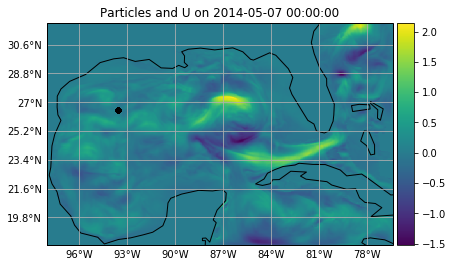

Second location
P[1000](lon=-87.592003, lat=27.943001, depth=0.000000, time=4060800.000000)
P[1001](lon=-87.592003, lat=27.943001, depth=0.000000, time=4060800.000000)
P[1002](lon=-87.592003, lat=27.943001, depth=0.000000, time=4060800.000000)
P[1003](lon=-87.592003, lat=27.943001, depth=0.000000, time=4060800.000000)
P[1004](lon=-87.592003, lat=27.943001, depth=0.000000, time=4060800.000000)
P[1005](lon=-87.592003, lat=27.943001, depth=0.000000, time=4060800.000000)
P[1006](lon=-87.592003, lat=27.943001, depth=0.000000, time=4060800.000000)
P[1007](lon=-87.592003, lat=27.943001, depth=0.000000, time=4060800.000000)
P[1008](lon=-87.592003, lat=27.943001, depth=0.000000, time=4060800.000000)
P[1009](lon=-87.592003, lat=27.943001, depth=0.000000, time=4060800.000000)
P[1010](lon=-87.592003, lat=27.943001, depth=0.000000, time=4060800.000000)
P[1011](lon=-87.592003, lat=27.943001, depth=0.000000, time=4060800.000000)
P[1012](lon=-87.592003, lat=27.943001, depth=0.000000, time=4060800.0000

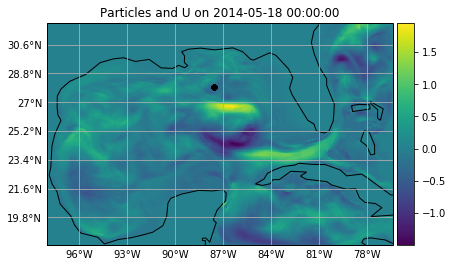

In [5]:
#lat = [ -92]
#lon = [ 26]
# #To release 100 particles instead of 1 particle per location. 
# pset = ParticleSet(fieldset=fieldset, pclass=JITParticle, lon=lonx100, lat=latx100)
#first location
print("First Location")
time = datetime.datetime(2014, 5, 7)

#filenames = {'U': fname, 'V': fname, 'temp': fname}
#variables = {'U': 'u', 'V': 'v', 'temp': 'temperature'}
#dimensions = {'lat': 'lat', 'lon': 'lon', 'time': 'time', 'depth': 'Depth'}
#indices = {'lon': range(1, 540), 'lat': range(1, 384)}
#pset = ParticleSet(fieldset=fieldset, pclass=JITParticle, lon=lon, lat=lat,time=time)#,time=time)
pset = ParticleSet.from_list(fieldset=fieldset,   # the fields on which the particles are advected
                             pclass=JITParticle,  # the type of particles (JITParticle or ScipyParticle)
                             lon=[-93.5820]*1000, # a vector of release longitudes 
                             lat=[26.5347]*1000, # a vector of release latitudes
                            time = time)   
print(pset)
pset.show(field=fieldset.U)
#fieldset.U.show()

print("Second location")
#second location
time2 = datetime.datetime(2014, 5, 18)


pset2 = ParticleSet.from_list(fieldset=fieldset,   # the fields on which the particles are advected
                             pclass=JITParticle,  # the type of particles (JITParticle or ScipyParticle)
                             lon=[-87.5920]*1000, # a vector of release longitudes 
                             lat=[27.9430]*1000, # a vector of release latitudes
                            time = time2)   
print(pset2)
pset2.show(field=fieldset.U)


In [11]:
#pset = ParticleSet(fieldset=fieldset, pclass=JITParticle, lon=lon, lat=lat)

pset.execute(AdvectionRK4,                 # the kernel (which defines how particles move)
             runtime=timedelta(days=10),    # the total length of the run
             dt=timedelta(minutes=1),      # the timestep of the kernel
             output_file=pset.ParticleFile(name="TestParticlesLocation1.nc", outputdt=timedelta(hours=1)))

pset2.execute(AdvectionRK4,                 # the kernel (which defines how particles move)
             runtime=timedelta(days=10),    # the total length of the run
             dt=timedelta(minutes=1),      # the timestep of the kernel
             output_file=pset.ParticleFile(name="TestParticlesLocation2.nc", outputdt=timedelta(hours=1)))

INFO: Compiled JITParticleAdvectionRK4 ==> C:\Users\Mingtai\AppData\Local\Temp\parcels-tmp\a4128ef0fafd0b471b40a0961f1ae19f.dll
100% (864000.0 of 864000.0) |############| Elapsed Time: 0:03:01 Time:  0:03:01
INFO: Compiled JITParticleAdvectionRK4 ==> C:\Users\Mingtai\AppData\Local\Temp\parcels-tmp\4c5ad20995e6aacd9402506feaea42dc.dll
100% (864000.0 of 864000.0) |############| Elapsed Time: 0:02:50 Time:  0:02:50


P[200](lon=-93.655434, lat=25.786798, depth=0.000000, time=3974400.000000)
P[201](lon=-93.655434, lat=25.786798, depth=0.000000, time=3974400.000000)
P[202](lon=-93.655434, lat=25.786798, depth=0.000000, time=3974400.000000)
P[203](lon=-93.655434, lat=25.786798, depth=0.000000, time=3974400.000000)
P[204](lon=-93.655434, lat=25.786798, depth=0.000000, time=3974400.000000)
P[205](lon=-93.655434, lat=25.786798, depth=0.000000, time=3974400.000000)
P[206](lon=-93.655434, lat=25.786798, depth=0.000000, time=3974400.000000)
P[207](lon=-93.655434, lat=25.786798, depth=0.000000, time=3974400.000000)
P[208](lon=-93.655434, lat=25.786798, depth=0.000000, time=3974400.000000)
P[209](lon=-93.655434, lat=25.786798, depth=0.000000, time=3974400.000000)
P[210](lon=-93.655434, lat=25.786798, depth=0.000000, time=3974400.000000)
P[211](lon=-93.655434, lat=25.786798, depth=0.000000, time=3974400.000000)
P[212](lon=-93.655434, lat=25.786798, depth=0.000000, time=3974400.000000)
P[213](lon=-93.655434, la

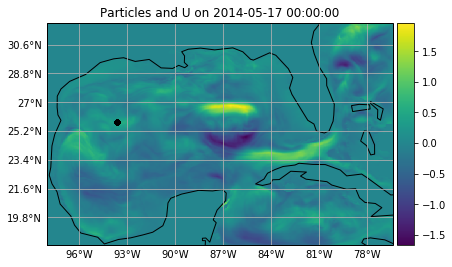

P[1200](lon=-87.690567, lat=27.635750, depth=0.000000, time=4924800.000000)
P[1201](lon=-87.690567, lat=27.635750, depth=0.000000, time=4924800.000000)
P[1202](lon=-87.690567, lat=27.635750, depth=0.000000, time=4924800.000000)
P[1203](lon=-87.690567, lat=27.635750, depth=0.000000, time=4924800.000000)
P[1204](lon=-87.690567, lat=27.635750, depth=0.000000, time=4924800.000000)
P[1205](lon=-87.690567, lat=27.635750, depth=0.000000, time=4924800.000000)
P[1206](lon=-87.690567, lat=27.635750, depth=0.000000, time=4924800.000000)
P[1207](lon=-87.690567, lat=27.635750, depth=0.000000, time=4924800.000000)
P[1208](lon=-87.690567, lat=27.635750, depth=0.000000, time=4924800.000000)
P[1209](lon=-87.690567, lat=27.635750, depth=0.000000, time=4924800.000000)
P[1210](lon=-87.690567, lat=27.635750, depth=0.000000, time=4924800.000000)
P[1211](lon=-87.690567, lat=27.635750, depth=0.000000, time=4924800.000000)
P[1212](lon=-87.690567, lat=27.635750, depth=0.000000, time=4924800.000000)
P[1213](lon=

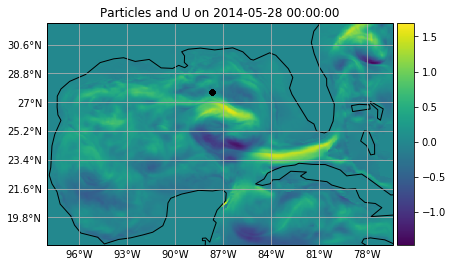

In [12]:
print(pset)
pset.show(field=fieldset.U)
print(pset2)
pset2.show(field=fieldset.U)

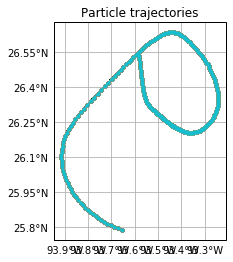

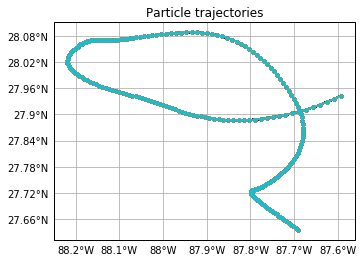

In [13]:
plotTrajectoriesFile('TestParticlesLocation1.nc');
plotTrajectoriesFile('TestParticlesLocation2.nc');

In [14]:
# base map 
pfile = Dataset('TestParticlesLocation1.nc', 'r')
lon = pfile.variables['lon']

# For determining the boundaries of the basemap
print('min long: ', np.nanmin(lon))
print('max long: ', np.nanmax(lon))

lat = pfile.variables['lat']
print('min lat: ', np.nanmin(lat))
print('max lat: ', np.nanmax(lat))


# For determining the boundaries of the basemap
min_long = np.nanmin(lon)
max_long = np.nanmax(lon)
min_lat = np.nanmin(lat)
max_lat = np.nanmax(lat)

min long:  -93.91461
max long:  -93.241486
min lat:  25.786798
max lat:  26.635483


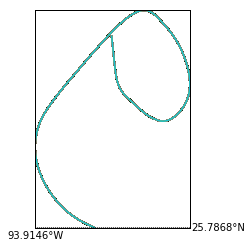

In [15]:
mapper = Basemap(projection='merc',
                 llcrnrlon=np.nanmin(lon),
                 llcrnrlat=np.nanmin(lat),
                 urcrnrlon=np.nanmax(lon),
                 urcrnrlat=np.nanmax(lat),
                 resolution='i')
mapper.drawmapboundary()
mapper.drawcoastlines()
mapper.fillcontinents(color='coral',lake_color='aqua')
# plot each trajectory separately
# documentation: https://matplotlib.org/basemap/index.html
for i in range(lon.shape[0]):
    lons = lon[:][i]
    lats = lat[:][i]
    mapper.plot(np.array(lons), np.array(lats), latlon=True)

parallels = np.arange(min_lat,max_lat,5.)
# labels = [left,right,top,bottom]
mapper.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(min_long,max_long,10)
mapper.drawmeridians(meridians,labels=[True,False,False,True])

plt.show()

In [16]:
# base map 
pfile = Dataset('TestParticlesLocation2.nc', 'r')
lon = pfile.variables['lon']

# For determining the boundaries of the basemap
print('min long: ', np.nanmin(lon))
print('max long: ', np.nanmax(lon))

lat = pfile.variables['lat']
print('min lat: ', np.nanmin(lat))
print('max lat: ', np.nanmax(lat))


# For determining the boundaries of the basemap
min_long = np.nanmin(lon)
max_long = np.nanmax(lon)
min_lat = np.nanmin(lat)
max_lat = np.nanmax(lat)

min long:  -88.219185
max long:  -87.592
min lat:  27.63575
max lat:  28.088013


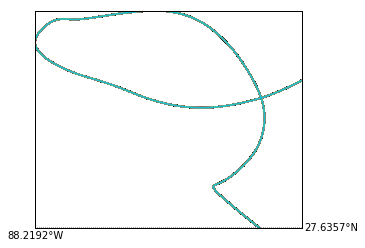

In [17]:
mapper = Basemap(projection='merc',
                 llcrnrlon=np.nanmin(lon),
                 llcrnrlat=np.nanmin(lat),
                 urcrnrlon=np.nanmax(lon),
                 urcrnrlat=np.nanmax(lat),
                 resolution='i')
mapper.drawmapboundary()
mapper.drawcoastlines()
mapper.fillcontinents(color='coral',lake_color='aqua')
# plot each trajectory separately
# documentation: https://matplotlib.org/basemap/index.html
for i in range(lon.shape[0]):
    lons = lon[:][i]
    lats = lat[:][i]
    mapper.plot(np.array(lons), np.array(lats), latlon=True)

parallels = np.arange(min_lat,max_lat,5.)
# labels = [left,right,top,bottom]
mapper.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(min_long,max_long,10)
mapper.drawmeridians(meridians,labels=[True,False,False,True])

plt.show()

now for adding turbulance..


In [18]:
def turbVal(particle, fieldset, time):
    dt = 1
    Kh = 100
    kh_zonal = Kh / math.pow(1000. * 1.852 * 60. * math.cos(particle.lat * M_PI / 180), 2)
    kh_meridional = Kh / math.pow(1000.0 * 1.852 * 60.0, 2)

    r = 1/3.
    particle.lat += random.uniform(-1., 1.)*math.sqrt(2*math.fabs(dt)*kh_meridional/r)
    particle.lon += random.uniform(-1., 1.)*math.sqrt(2*math.fabs(dt)*kh_zonal/r)

# How many times to repeat
npart = 1000

In [19]:
# with turbulance print("First Location")
time = datetime.datetime(2014, 5, 7)
  
lat = [26.5347]
lon = [-93.5820]
print(pset)
pset = ParticleSet(fieldset=fieldset, pclass=JITParticle,
                   lon=np.tile(lon,npart), lat=np.tile(lat,npart),time=time)
print(pset)
print(type(pset))
#print(pset.lat)
# need to extract values and update them, or access the lat and long to add to... 
value = fieldset.U[time, particle.depth, particle.lat, particle.lon]
pset.show(field=fieldset.U)


P[200](lon=-93.655434, lat=25.786798, depth=0.000000, time=3974400.000000)
P[201](lon=-93.655434, lat=25.786798, depth=0.000000, time=3974400.000000)
P[202](lon=-93.655434, lat=25.786798, depth=0.000000, time=3974400.000000)
P[203](lon=-93.655434, lat=25.786798, depth=0.000000, time=3974400.000000)
P[204](lon=-93.655434, lat=25.786798, depth=0.000000, time=3974400.000000)
P[205](lon=-93.655434, lat=25.786798, depth=0.000000, time=3974400.000000)
P[206](lon=-93.655434, lat=25.786798, depth=0.000000, time=3974400.000000)
P[207](lon=-93.655434, lat=25.786798, depth=0.000000, time=3974400.000000)
P[208](lon=-93.655434, lat=25.786798, depth=0.000000, time=3974400.000000)
P[209](lon=-93.655434, lat=25.786798, depth=0.000000, time=3974400.000000)
P[210](lon=-93.655434, lat=25.786798, depth=0.000000, time=3974400.000000)
P[211](lon=-93.655434, lat=25.786798, depth=0.000000, time=3974400.000000)
P[212](lon=-93.655434, lat=25.786798, depth=0.000000, time=3974400.000000)
P[213](lon=-93.655434, la

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



NameError: name 'particle' is not defined

In [20]:
#lat = [26.5347]
#lon = [-93.5820]
#time = datetime.datetime(2014, 5, 7)
#timenumber = int(time)
#k_turbVal = turbVal(lat,lon,fieldset,time=126,dt=1)  
k_turbVal = pset.Kernel(turbVal)        # casting the turbVal function to a kernel object


In [ ]:
now = time.time()

# Set random seed
random.seed(123456)

days = 10
runtime = timedelta(days=days)

pset = ParticleSet(fieldset=fieldset, pclass=JITParticle,
                   lon=np.tile(lon,npart), lat=np.tile(lat,npart))
pset.execute(AdvectionRK4 + k_turbVal, # Add Turbulence to Advection!
             runtime=runtime,
             dt=timedelta(hours=1),
             recovery={ErrorCode.ErrorOutOfBounds: DeleteParticle},
             output_file=pset.ParticleFile(name="{}n_Turbulence_{}repeats_{}days".format(len(lat),npart,days),
                                           outputdt=timedelta(days=1)))   # output is low resolution (1 day)
time_elapsed = time.time() -now
print('time elapsed (s): ', time_elapsed)
plotTrajectoriesFile("{}3n_Turbulence_{}repeats_{}days.nc".format(len(lat),npart,days))

In [ ]:
# PLOT WITH BASEMAP AND BATHYMETRY DATA
pfile = Dataset('1n_Turbulence_1000repeats_10days.nc', 'r')


# For determining the boundaries of the basemap
lon = pfile.variables['lon']

# print('min long: ', np.nanmin(lon))
# print('max long: ', np.nanmax(lon))

lat = pfile.variables['lat']
# print('min lat: ', np.nanmin(lat))
# print('max lat: ', np.nanmax(lat))

# Set up the figure, change figsize as needed
plt.figure(figsize=(12,6))

# Set up mapper with a Basemap of coastal boundaries for Hawaii
mapper = Basemap(projection='merc',
                 llcrnrlon=np.nanmin(lon),
                 llcrnrlat=np.nanmin(lat),
                 urcrnrlon=np.nanmax(lon),
                 urcrnrlat=np.nanmax(lat),
                 resolution='i')
mapper.drawmapboundary()
mapper.drawcoastlines()
mapper.fillcontinents(color='coral',lake_color='aqua')

# plot each trajectory separately, in gold color
# documentation: https://matplotlib.org/basemap/index.html
for i in range(lon.shape[0]):
    lons = lon[:][i]
    lats = lat[:][i]
    mapper.plot(np.array(lons), np.array(lats), latlon=True, color='black')

    
# Plot 18 origin points

#origin_lat = [31.082, 29.152, 32.794, 30.900, 27.781, 27.952, 18.640, 29.661, 24.174, 21.020, 34.102, 33.462, 31.458, 32.024, 15.509, 18.906, 17.074, 16.555]
#origin_lon = [176.366, 191.072, 197.52, 193.91, 178.991, 194.899, 178.040, 208.099, 191.298, 187.602, 188.077, 181.109, 183.82, 179.190, 180.468, 189.375, 206.097, 190.914]
origin_lat = [26.5347, 27.9430]
origin_lon = [-93.5820,  -87.5920]
mapper.plot(origin_lon, origin_lat, latlon=True, color='red')


# Change plot titles
plt.title('Trajectories of 1 Drifter, repeated 1000 times, over 10 Days', fontsize=20)
plt.savefig('n1_r1000_d10_1.png')

plt.show()

In [ ]:
# with turbulance 
print("Second Location")
time2 = datetime.datetime(2014, 5, 18)
  
lon=[-87.5920]
lat=[27.9430]
pset2 = ParticleSet(fieldset=fieldset, pclass=JITParticle,
                   lon=np.tile(lon,npart), lat=np.tile(lat,npart),time=time2)
print(pset2)
print(type(pset2))
#print(pset.lat)
# need to extract values and update them, or access the lat and long to add to... 
value = fieldset.U[time, particle.depth, particle.lat, particle.lon]
pset2.show(field=fieldset.U)

In [ ]:
k_turbVal2 = pset2.Kernel(turbVal)

In [ ]:
now = time2.time()

# Set random seed
random.seed(123456)

days = 10
runtime = timedelta(days=days)
lat = [-87.5920]
lon = [27.9430]



pset2.execute(AdvectionRK4 + k_turbVal2, # Add Turbulence to Advection!
             runtime=runtime,
             dt=timedelta(hours=1),
             recovery={ErrorCode.ErrorOutOfBounds: DeleteParticle},
             output_file=pset2.ParticleFile(name="{}n_Turbulence_{}repeats_{}days_2".format(len(lat),npart,days),
                                           outputdt=timedelta(days=1)))   # output is low resolution (1 day)
time_elapsed = time.time() -now
print('time elapsed (s): ', time_elapsed)
plotTrajectoriesFile("{}3n_Turbulence_{}repeats_{}days_2.nc".format(len(lat),npart,days))

In [ ]:
# PLOT WITH BASEMAP AND BATHYMETRY DATA
pfile = Dataset('1n_Turbulence_1000repeats_10days_2.nc', 'r')


# For determining the boundaries of the basemap
lon = pfile.variables['lon']

# print('min long: ', np.nanmin(lon))
# print('max long: ', np.nanmax(lon))

lat = pfile.variables['lat']
# print('min lat: ', np.nanmin(lat))
# print('max lat: ', np.nanmax(lat))

# Set up the figure, change figsize as needed
plt.figure(figsize=(12,6))

# Set up mapper with a Basemap of coastal boundaries for Hawaii
mapper = Basemap(projection='merc',
                 llcrnrlon=np.nanmin(lon),
                 llcrnrlat=np.nanmin(lat),
                 urcrnrlon=np.nanmax(lon),
                 urcrnrlat=np.nanmax(lat),
                 resolution='i')
mapper.drawmapboundary()
mapper.drawcoastlines()
mapper.fillcontinents(color='coral',lake_color='aqua')

# plot each trajectory separately, in gold color
# documentation: https://matplotlib.org/basemap/index.html
for i in range(lon.shape[0]):
    lons = lon[:][i]
    lats = lat[:][i]
    mapper.plot(np.array(lons), np.array(lats), latlon=True, color='black')

    
# Plot 18 origin points

#origin_lat = [31.082, 29.152, 32.794, 30.900, 27.781, 27.952, 18.640, 29.661, 24.174, 21.020, 34.102, 33.462, 31.458, 32.024, 15.509, 18.906, 17.074, 16.555]
#origin_lon = [176.366, 191.072, 197.52, 193.91, 178.991, 194.899, 178.040, 208.099, 191.298, 187.602, 188.077, 181.109, 183.82, 179.190, 180.468, 189.375, 206.097, 190.914]
origin_lat = [26.5347, 27.9430]
origin_lon = [-93.5820,  -87.5920]
mapper.plot(origin_lon, origin_lat, latlon=True, color='red')


# Change plot titles
plt.title('Trajectories of 1 Drifter, repeated 1000 times, over 10 Days', fontsize=20)
plt.savefig('n2_r1000_d10_1.png')

plt.show()

Now backtracking

In [ ]:
#lat = [ -92]
#lon = [ 26]
time = datetime.datetime(2014, 5, 7)

k_turbVal = pset.Kernel(turbVal)

#filenames = {'U': fname, 'V': fname, 'temp': fname}
#variables = {'U': 'u', 'V': 'v', 'temp': 'temperature'}
#dimensions = {'lat': 'lat', 'lon': 'lon', 'time': 'time', 'depth': 'Depth'}
#indices = {'lon': range(1, 540), 'lat': range(1, 384)}
#pset = ParticleSet(fieldset=fieldset, pclass=JITParticle, lon=lon, lat=lat,time=time)#,time=time)
pset = ParticleSet.from_list(fieldset=fieldset,   # the fields on which the particles are advected
                             pclass=JITParticle,  # the type of particles (JITParticle or ScipyParticle)
                             lon=[-93.5820]*100, # a vector of release longitudes 
                             lat=[26.5347]*100, # a vector of release latitudes
                            time = time)   
print(pset)
pset.show(field=fieldset.U)

pset.execute(AdvectionRK4 + k_turbVal,                 # the kernel (which defines how particles move)
             runtime=timedelta(days=10),    # the total length of the run
             dt=-timedelta(minutes=1),      # the timestep of the kernel
             output_file=pset.ParticleFile(name="TestParticlesbackt1.nc", outputdt=timedelta(hours=1))
            )
print(pset)
pset.show(field=fieldset.U)
plotTrajectoriesFile('TestParticlesbackt1.nc');

In [ ]:
# PLOT WITH BASEMAP AND BATHYMETRY DATA
pfile = Dataset('TestParticlesbackt1.nc', 'r')


# For determining the boundaries of the basemap
lon = pfile.variables['lon']

# print('min long: ', np.nanmin(lon))
# print('max long: ', np.nanmax(lon))

lat = pfile.variables['lat']
# print('min lat: ', np.nanmin(lat))
# print('max lat: ', np.nanmax(lat))

# Set up the figure, change figsize as needed
plt.figure(figsize=(12,6))

# Set up mapper with a Basemap of coastal boundaries for Hawaii
mapper = Basemap(projection='merc',
                 llcrnrlon=np.nanmin(lon),
                 llcrnrlat=np.nanmin(lat),
                 urcrnrlon=np.nanmax(lon),
                 urcrnrlat=np.nanmax(lat),
                 resolution='i')
mapper.drawmapboundary()
mapper.drawcoastlines()
mapper.fillcontinents(color='coral',lake_color='aqua')

# plot each trajectory separately, in gold color
# documentation: https://matplotlib.org/basemap/index.html
for i in range(lon.shape[0]):
    lons = lon[:][i]
    lats = lat[:][i]
    mapper.plot(np.array(lons), np.array(lats), latlon=True, color='black')

    
# Plot 18 origin points

#origin_lat = [31.082, 29.152, 32.794, 30.900, 27.781, 27.952, 18.640, 29.661, 24.174, 21.020, 34.102, 33.462, 31.458, 32.024, 15.509, 18.906, 17.074, 16.555]
#origin_lon = [176.366, 191.072, 197.52, 193.91, 178.991, 194.899, 178.040, 208.099, 191.298, 187.602, 188.077, 181.109, 183.82, 179.190, 180.468, 189.375, 206.097, 190.914]
origin_lat = [26.5347, 27.9430]
origin_lon = [-93.5820,  -87.5920]
mapper.plot(origin_lon, origin_lat, latlon=True, color='red')


# Change plot titles
plt.title('Trajectories of 1 Drifters, repeated 100 times, backtracked', fontsize=20)
plt.savefig('n1_r100_d10_2.png')

plt.show()

In [ ]:
#lat = [ -92]
#lon = [ 26]
time = datetime.datetime(2014, 5, 7)

#filenames = {'U': fname, 'V': fname, 'temp': fname}
#variables = {'U': 'u', 'V': 'v', 'temp': 'temperature'}
#dimensions = {'lat': 'lat', 'lon': 'lon', 'time': 'time', 'depth': 'Depth'}
#indices = {'lon': range(1, 540), 'lat': range(1, 384)}
#pset = ParticleSet(fieldset=fieldset, pclass=JITParticle, lon=lon, lat=lat,time=time)#,time=time)
pset2 = ParticleSet.from_list(fieldset=fieldset,    # the fields on which the particles are advected
                             pclass=JITParticle,  # the type of particles (JITParticle or ScipyParticle)
                             lon=[-87.5920], # a vector of release longitudes 
                             lat=[27.9430], # a vector of release latitudes
                            time = time)   
print(pset2)
pset.show(field=fieldset.U)

pset2.execute(AdvectionRK4 + k_turbVal2,                 # the kernel (which defines how particles move)
             runtime=timedelta(days=10),    # the total length of the run
             dt=-timedelta(minutes=1),      # the timestep of the kernel
             output_file=pset.ParticleFile(name="TestParticlesbackt2.nc", outputdt=timedelta(hours=1))
            )
print(pset2)
pset2.show(field=fieldset.U)
plotTrajectoriesFile('TestParticlesbackt2.nc');

In [ ]:
# PLOT WITH BASEMAP AND BATHYMETRY DATA
pfile = Dataset('TestParticlesbackt2.nc', 'r')


# For determining the boundaries of the basemap
lon = pfile.variables['lon']

# print('min long: ', np.nanmin(lon))
# print('max long: ', np.nanmax(lon))

lat = pfile.variables['lat']
# print('min lat: ', np.nanmin(lat))
# print('max lat: ', np.nanmax(lat))

# Set up the figure, change figsize as needed
plt.figure(figsize=(12,6))

# Set up mapper with a Basemap of coastal boundaries for Hawaii
mapper = Basemap(projection='merc',
                 llcrnrlon=np.nanmin(lon),
                 llcrnrlat=np.nanmin(lat),
                 urcrnrlon=np.nanmax(lon),
                 urcrnrlat=np.nanmax(lat),
                 resolution='i')
mapper.drawmapboundary()
mapper.drawcoastlines()
mapper.fillcontinents(color='coral',lake_color='aqua')

# plot each trajectory separately, in gold color
# documentation: https://matplotlib.org/basemap/index.html
for i in range(lon.shape[0]):
    lons = lon[:][i]
    lats = lat[:][i]
    mapper.plot(np.array(lons), np.array(lats), latlon=True, color='black')

    
# Plot 18 origin points

#origin_lat = [31.082, 29.152, 32.794, 30.900, 27.781, 27.952, 18.640, 29.661, 24.174, 21.020, 34.102, 33.462, 31.458, 32.024, 15.509, 18.906, 17.074, 16.555]
#origin_lon = [176.366, 191.072, 197.52, 193.91, 178.991, 194.899, 178.040, 208.099, 191.298, 187.602, 188.077, 181.109, 183.82, 179.190, 180.468, 189.375, 206.097, 190.914]
origin_lat = [26.5347, 27.9430]
origin_lon = [-93.5820,  -87.5920]
mapper.plot(origin_lon, origin_lat, latlon=True, color='red')


# Change plot titles
plt.title('Trajectories of 1 Drifters, repeated 100 times, backtracked', fontsize=20)
plt.savefig('n1_r100_d10_2.png')

plt.show()

In [4]:
def BrownianDiffusion(particle, fieldset, time):
    dt = 1
    Kh = 100
    kh_zonal = Kh / math.pow(1000. * 1.852 * 60. * math.cos(particle.lat * M_PI / 180), 2)
    kh_meridional = Kh / math.pow(1000.0 * 1.852 * 60.0, 2)

    r = 1/3.
    particle.lat += random.uniform(-1., 1.)*math.sqrt(2*math.fabs(dt)*kh_meridional/r)
    particle.lon += random.uniform(-1., 1.)*math.sqrt(2*math.fabs(dt)*kh_zonal/r)

P[0](lon=-93.582001, lat=26.534700, depth=0.000000, time=3110400.000000)
P[1](lon=-93.582001, lat=26.534700, depth=0.000000, time=3110400.000000)
P[2](lon=-93.582001, lat=26.534700, depth=0.000000, time=3110400.000000)
P[3](lon=-93.582001, lat=26.534700, depth=0.000000, time=3110400.000000)
P[4](lon=-93.582001, lat=26.534700, depth=0.000000, time=3110400.000000)
P[5](lon=-93.582001, lat=26.534700, depth=0.000000, time=3110400.000000)
P[6](lon=-93.582001, lat=26.534700, depth=0.000000, time=3110400.000000)
P[7](lon=-93.582001, lat=26.534700, depth=0.000000, time=3110400.000000)
P[8](lon=-93.582001, lat=26.534700, depth=0.000000, time=3110400.000000)
P[9](lon=-93.582001, lat=26.534700, depth=0.000000, time=3110400.000000)
P[10](lon=-93.582001, lat=26.534700, depth=0.000000, time=3110400.000000)
P[11](lon=-93.582001, lat=26.534700, depth=0.000000, time=3110400.000000)
P[12](lon=-93.582001, lat=26.534700, depth=0.000000, time=3110400.000000)
P[13](lon=-93.582001, lat=26.534700, depth=0.000

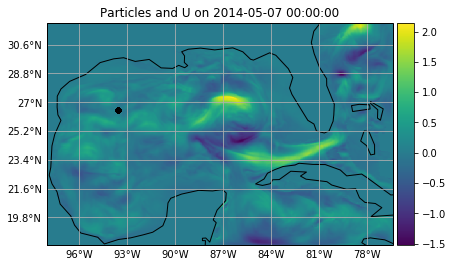

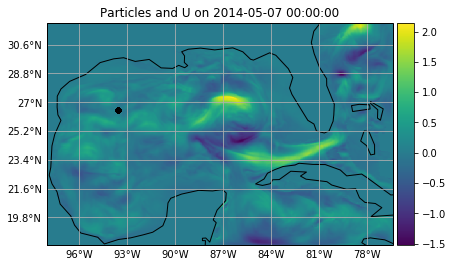

In [5]:
# with turbulance print("First Location")
npart = 1000
time = datetime.datetime(2014, 5, 7)
  
lat = [26.5347]
lon = [-93.5820]
#print(pset)
pset = ParticleSet(fieldset=fieldset, pclass=JITParticle,
                   lon=np.tile(lon,npart), lat=np.tile(lat,npart),time=time)
print(pset)
print(type(pset))
#print(pset.lat)
# need to extract values and update them, or access the lat and long to add to... 
pset.show(field=fieldset.U)
k_turbVal = pset.Kernel(BrownianDiffusion) 
pset.show(field=fieldset.U)


INFO: Compiled JITParticleAdvectionRK4BrownianDiffusion ==> C:\Users\Mingtai\AppData\Local\Temp\parcels-tmp\8e04a432255a00ea2094d6357bb6bf49.dll
100% (864000.0 of 864000.0) |############| Elapsed Time: 0:03:09 Time:  0:03:09


P[60795](lon=-94.269936, lat=27.740881, depth=0.000000, time=2246400.000000)
P[60796](lon=-94.265205, lat=27.738386, depth=0.000000, time=2246400.000000)
P[60797](lon=-94.315163, lat=27.697653, depth=0.000000, time=2246400.000000)
P[60798](lon=-94.301529, lat=27.702435, depth=0.000000, time=2246400.000000)
P[60799](lon=-94.315948, lat=27.723249, depth=0.000000, time=2246400.000000)
P[60800](lon=-94.257347, lat=27.715448, depth=0.000000, time=2246400.000000)
P[60801](lon=-94.325958, lat=27.670855, depth=0.000000, time=2246400.000000)
P[60802](lon=-94.244980, lat=27.721018, depth=0.000000, time=2246400.000000)
P[60803](lon=-94.253899, lat=27.736137, depth=0.000000, time=2246400.000000)
P[60804](lon=-94.323662, lat=27.691874, depth=0.000000, time=2246400.000000)
P[60805](lon=-94.251274, lat=27.719810, depth=0.000000, time=2246400.000000)
P[60806](lon=-94.236046, lat=27.721708, depth=0.000000, time=2246400.000000)
P[60807](lon=-94.301315, lat=27.719606, depth=0.000000, time=2246400.000000)

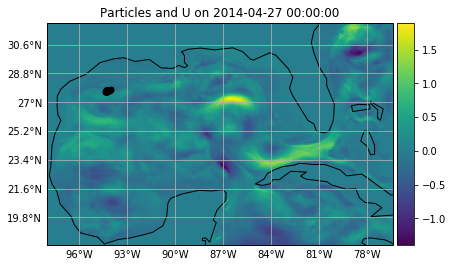

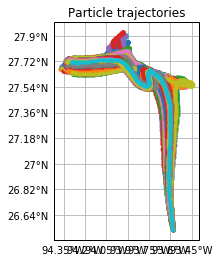

In [8]:
pset.execute(AdvectionRK4 + k_turbVal,                 # the kernel (which defines how particles move)
             runtime=timedelta(days=10),    # the total length of the run
             dt=-timedelta(minutes=1),      # the timestep of the kernel
             output_file=pset.ParticleFile(name="TestParticlesbackt1.nc", outputdt=timedelta(hours=1))
            )
print(pset)
pset.show(field=fieldset.U)
plotTrajectoriesFile('TestParticlesbackt1.nc');

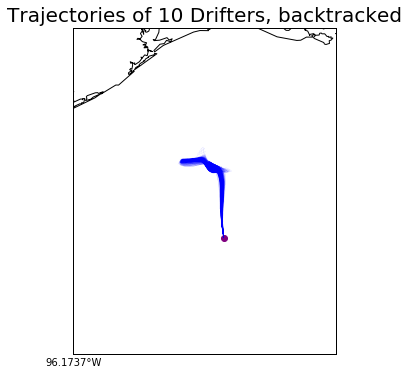

In [9]:
# PLOT WITH BASEMAP AND BATHYMETRY DATA
pfile = Dataset('TestParticlesbackt1.nc', 'r')


# For determining the boundaries of the basemap
lon = pfile.variables['lon']

# print('min long: ', np.nanmin(lon))
# print('max long: ', np.nanmax(lon))

lat = pfile.variables['lat']
# print('min lat: ', np.nanmin(lat))
# print('max lat: ', np.nanmax(lat))

# Set up the figure, change figsize as needed
plt.figure(figsize=(12,6))

# Set up mapper with a Basemap of coastal boundaries for Hawaii
mapper = Basemap(projection='merc',
                 llcrnrlon=np.nanmin(lon)-1.8,
                 llcrnrlat=np.nanmin(lat)-1.8,
                 urcrnrlon=np.nanmax(lon)+1.8,
                 urcrnrlat=np.nanmax(lat)+1.8,
                 resolution='i')
mapper.drawmapboundary()
mapper.drawcoastlines()
mapper.drawmeridians(np.arange(mapper.lonmin,mapper.lonmax+30,60),labels=[0,0,0,1])
#mapper.fillcontinents(color='coral',lake_color='aqua')

# plot each trajectory separately, in gold color
# documentation: https://matplotlib.org/basemap/index.html
for i in range(lon.shape[0]):
    lons = lon[:][i]
    lats = lat[:][i]
    mapper.plot(np.array(lons), np.array(lats), latlon=True, color='blue',linewidth=.03)

    
# Plot 18 origin points

#origin_lat = [31.082, 29.152, 32.794, 30.900, 27.781, 27.952, 18.640, 29.661, 24.174, 21.020, 34.102, 33.462, 31.458, 32.024, 15.509, 18.906, 17.074, 16.555]
#origin_lon = [176.366, 191.072, 197.52, 193.91, 178.991, 194.899, 178.040, 208.099, 191.298, 187.602, 188.077, 181.109, 183.82, 179.190, 180.468, 189.375, 206.097, 190.914]
origin_lat = [26.5347, 27.9430]
origin_lon = [-93.5820,  -87.5920]
mapper.scatter(origin_lon, origin_lat, latlon=True, color='purple')


# Change plot titles
plt.title('Trajectories of 10 Drifters, backtracked', fontsize=20)
plt.savefig('n1_r100_d10_2.png')

plt.show()

In [10]:
plotTrajectoriesFile('TestParticlesbackt1.nc', mode='movie2d_notebook')

P[61795](lon=-87.592003, lat=27.943001, depth=0.000000, time=4060800.000000)
P[61796](lon=-87.592003, lat=27.943001, depth=0.000000, time=4060800.000000)
P[61797](lon=-87.592003, lat=27.943001, depth=0.000000, time=4060800.000000)
P[61798](lon=-87.592003, lat=27.943001, depth=0.000000, time=4060800.000000)
P[61799](lon=-87.592003, lat=27.943001, depth=0.000000, time=4060800.000000)
P[61800](lon=-87.592003, lat=27.943001, depth=0.000000, time=4060800.000000)
P[61801](lon=-87.592003, lat=27.943001, depth=0.000000, time=4060800.000000)
P[61802](lon=-87.592003, lat=27.943001, depth=0.000000, time=4060800.000000)
P[61803](lon=-87.592003, lat=27.943001, depth=0.000000, time=4060800.000000)
P[61804](lon=-87.592003, lat=27.943001, depth=0.000000, time=4060800.000000)
P[61805](lon=-87.592003, lat=27.943001, depth=0.000000, time=4060800.000000)
P[61806](lon=-87.592003, lat=27.943001, depth=0.000000, time=4060800.000000)
P[61807](lon=-87.592003, lat=27.943001, depth=0.000000, time=4060800.000000)

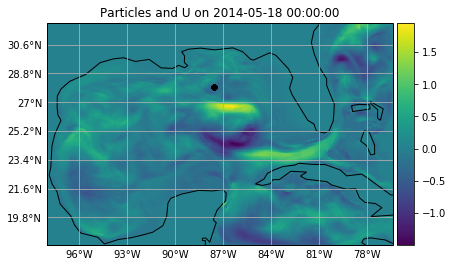

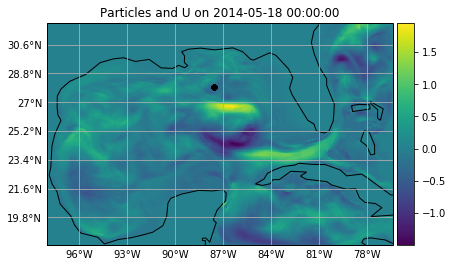

P[61795](lon=-87.592003, lat=27.943001, depth=0.000000, time=4060800.000000)
P[61796](lon=-87.592003, lat=27.943001, depth=0.000000, time=4060800.000000)
P[61797](lon=-87.592003, lat=27.943001, depth=0.000000, time=4060800.000000)
P[61798](lon=-87.592003, lat=27.943001, depth=0.000000, time=4060800.000000)
P[61799](lon=-87.592003, lat=27.943001, depth=0.000000, time=4060800.000000)
P[61800](lon=-87.592003, lat=27.943001, depth=0.000000, time=4060800.000000)
P[61801](lon=-87.592003, lat=27.943001, depth=0.000000, time=4060800.000000)
P[61802](lon=-87.592003, lat=27.943001, depth=0.000000, time=4060800.000000)
P[61803](lon=-87.592003, lat=27.943001, depth=0.000000, time=4060800.000000)
P[61804](lon=-87.592003, lat=27.943001, depth=0.000000, time=4060800.000000)
P[61805](lon=-87.592003, lat=27.943001, depth=0.000000, time=4060800.000000)
P[61806](lon=-87.592003, lat=27.943001, depth=0.000000, time=4060800.000000)
P[61807](lon=-87.592003, lat=27.943001, depth=0.000000, time=4060800.000000)

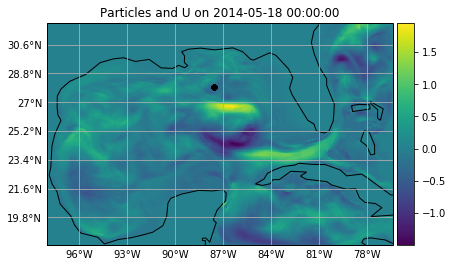

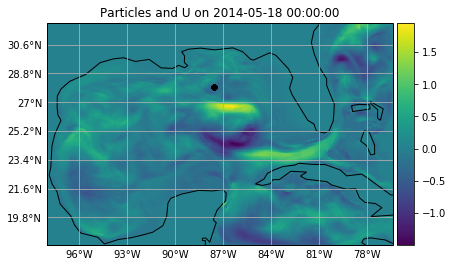

In [11]:
# with turbulance print("2nd Location")
npart = 1000
time = datetime.datetime(2014, 5, 18)
  
lon=[-87.5920], # a vector of release longitudes 
lat=[27.9430]
#print(pset)
pset2 = ParticleSet(fieldset=fieldset, pclass=JITParticle,
                   lon=np.tile(lon,npart), lat=np.tile(lat,npart),time=time)
print(pset2)
print(type(pset2))
#print(pset.lat)
# need to extract values and update them, or access the lat and long to add to... 
pset2.show(field=fieldset.U)
k_turbVal = pset.Kernel(BrownianDiffusion) 
pset2.show(field=fieldset.U)

print(pset2)
print(type(pset2))
#print(pset.lat)
# need to extract values and update them, or access the lat and long to add to... 
pset2.show(field=fieldset.U)
k_turbVal = pset.Kernel(BrownianDiffusion) 
pset2.show(field=fieldset.U)


INFO: Compiled JITParticleAdvectionRK4BrownianDiffusion ==> C:\Users\Mingtai\AppData\Local\Temp\parcels-tmp\515d7917958a7de5e942e72eab0fa8bc.dll
100% (864000.0 of 864000.0) |############| Elapsed Time: 0:03:17 Time:  0:03:17


P[61795](lon=-87.817009, lat=28.138355, depth=0.000000, time=3196800.000000)
P[61796](lon=-87.883034, lat=28.136568, depth=0.000000, time=3196800.000000)
P[61797](lon=-87.856010, lat=28.145720, depth=0.000000, time=3196800.000000)
P[61798](lon=-87.874306, lat=28.141623, depth=0.000000, time=3196800.000000)
P[61799](lon=-87.808907, lat=28.132593, depth=0.000000, time=3196800.000000)
P[61800](lon=-87.777374, lat=28.126179, depth=0.000000, time=3196800.000000)
P[61801](lon=-87.863861, lat=28.139231, depth=0.000000, time=3196800.000000)
P[61802](lon=-87.811157, lat=28.136112, depth=0.000000, time=3196800.000000)
P[61803](lon=-87.890373, lat=28.146856, depth=0.000000, time=3196800.000000)
P[61804](lon=-87.866623, lat=28.141806, depth=0.000000, time=3196800.000000)
P[61805](lon=-87.855927, lat=28.133078, depth=0.000000, time=3196800.000000)
P[61806](lon=-87.863083, lat=28.150612, depth=0.000000, time=3196800.000000)
P[61807](lon=-87.863899, lat=28.130308, depth=0.000000, time=3196800.000000)

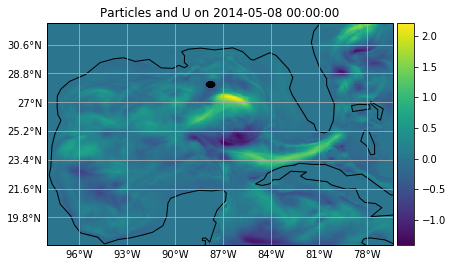

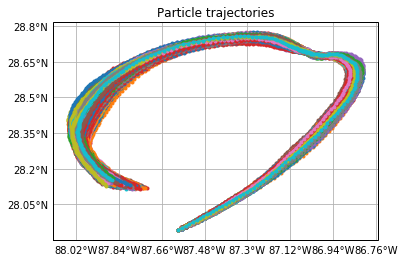

In [12]:
pset2.execute(AdvectionRK4 + k_turbVal,                 # the kernel (which defines how particles move)
             runtime=timedelta(days=10),    # the total length of the run
             dt=-timedelta(minutes=1),      # the timestep of the kernel
             output_file=pset.ParticleFile(name="TestParticlesbackt2.nc", outputdt=timedelta(hours=1))
            )
print(pset2)
pset2.show(field=fieldset.U)
plotTrajectoriesFile('TestParticlesbackt2.nc');

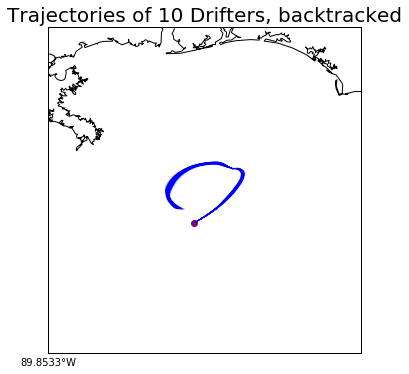

In [13]:
# PLOT WITH BASEMAP AND BATHYMETRY DATA
pfile = Dataset('TestParticlesbackt2.nc', 'r')


# For determining the boundaries of the basemap
lon = pfile.variables['lon']

# print('min long: ', np.nanmin(lon))
# print('max long: ', np.nanmax(lon))

lat = pfile.variables['lat']
# print('min lat: ', np.nanmin(lat))
# print('max lat: ', np.nanmax(lat))

# Set up the figure, change figsize as needed
plt.figure(figsize=(12,6))

# Set up mapper with a Basemap of coastal boundaries for Hawaii
mapper = Basemap(projection='merc',
                 llcrnrlon=np.nanmin(lon)-1.8,
                 llcrnrlat=np.nanmin(lat)-1.8,
                 urcrnrlon=np.nanmax(lon)+1.8,
                 urcrnrlat=np.nanmax(lat)+1.8,
                 resolution='i')
mapper.drawmapboundary()
mapper.drawcoastlines()
mapper.drawmeridians(np.arange(mapper.lonmin,mapper.lonmax+30,60),labels=[0,0,0,1])
#mapper.fillcontinents(color='coral',lake_color='aqua')

# plot each trajectory separately, in gold color
# documentation: https://matplotlib.org/basemap/index.html
for i in range(lon.shape[0]):
    lons = lon[:][i]
    lats = lat[:][i]
    mapper.plot(np.array(lons), np.array(lats), latlon=True, color='blue',linewidth=.03)

    
# Plot 18 origin points

#origin_lat = [31.082, 29.152, 32.794, 30.900, 27.781, 27.952, 18.640, 29.661, 24.174, 21.020, 34.102, 33.462, 31.458, 32.024, 15.509, 18.906, 17.074, 16.555]
#origin_lon = [176.366, 191.072, 197.52, 193.91, 178.991, 194.899, 178.040, 208.099, 191.298, 187.602, 188.077, 181.109, 183.82, 179.190, 180.468, 189.375, 206.097, 190.914]
origin_lat = [26.5347, 27.9430]
origin_lon = [-93.5820,  -87.5920]
mapper.scatter(origin_lon, origin_lat, latlon=True, color='purple')


# Change plot titles
plt.title('Trajectories of 10 Drifters, backtracked', fontsize=20)
plt.savefig('n2_r100_d10_2.png')

plt.show()

In [14]:
plotTrajectoriesFile('TestParticlesbackt2.nc', mode='movie2d_notebook')

In [25]:
#foward 
pset.execute(AdvectionRK4 + k_turbVal,                 # the kernel (which defines how particles move)
             runtime=timedelta(days=10),    # the total length of the run
             dt=-timedelta(minutes=1),      # the timestep of the kernel
             output_file=pset.ParticleFile(name="TestParticlesbackt1.nc", outputdt=timedelta(hours=1))
            )
print(pset)
pset.show(field=fieldset.U)
plotTrajectoriesFile('TestParticlesbackt1.nc');

In [26]:
variables = {'U': 'u',
             'V': 'v'}
dimensions = {'lat': 'lat_uv',
              'lon': 'lon_uv',
              'time': 'ocean_time'}

In [27]:
fieldset = FieldSet.from_netcdf(filenames, variables, dimensions,allow_time_extrapolation = True)

AssertionError: 